# CASE STUDY: PLANNING DEPARTMENT

## Key Learning Outcomes:
- Learn how to leverage the power of data science to predict business demand and plan accordingly.
- Understand the theory and intuition behind multiple linear regression models.
- Build and train multiple linear regression model in scikit learn.
- Evaluate trained regression models using various KPIs such as mean absolute error, root mean squared error, and mean absolute percentage error.
- Build an interactive dashboard using dash and plotly.
___
- **Planning + Regression + Regression KPIs + Dashboard Plotly + Dash**
___

## TASK-1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

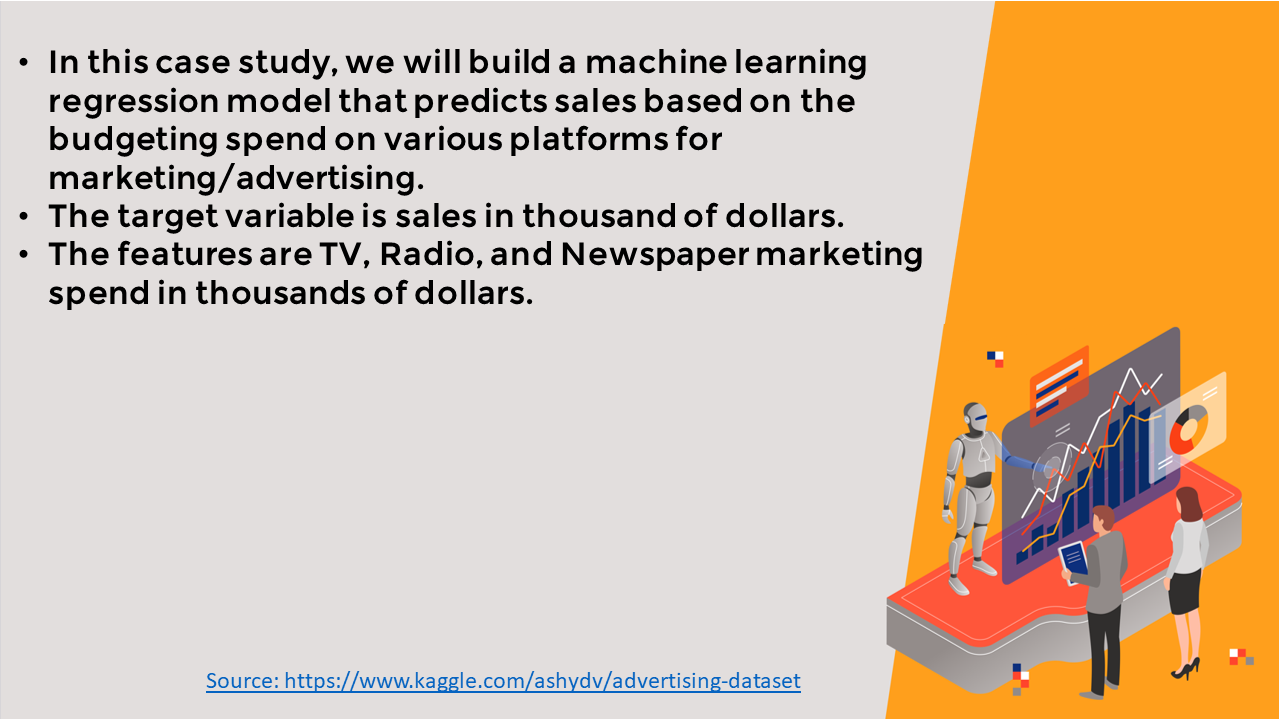

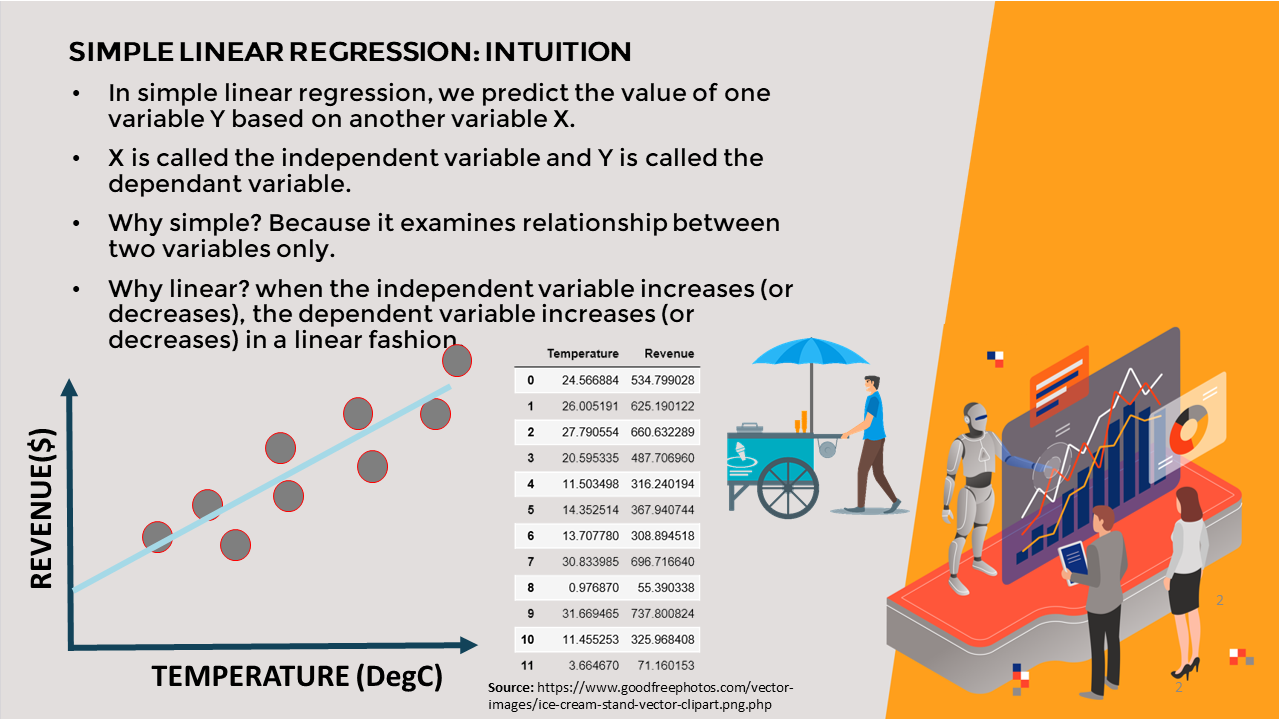

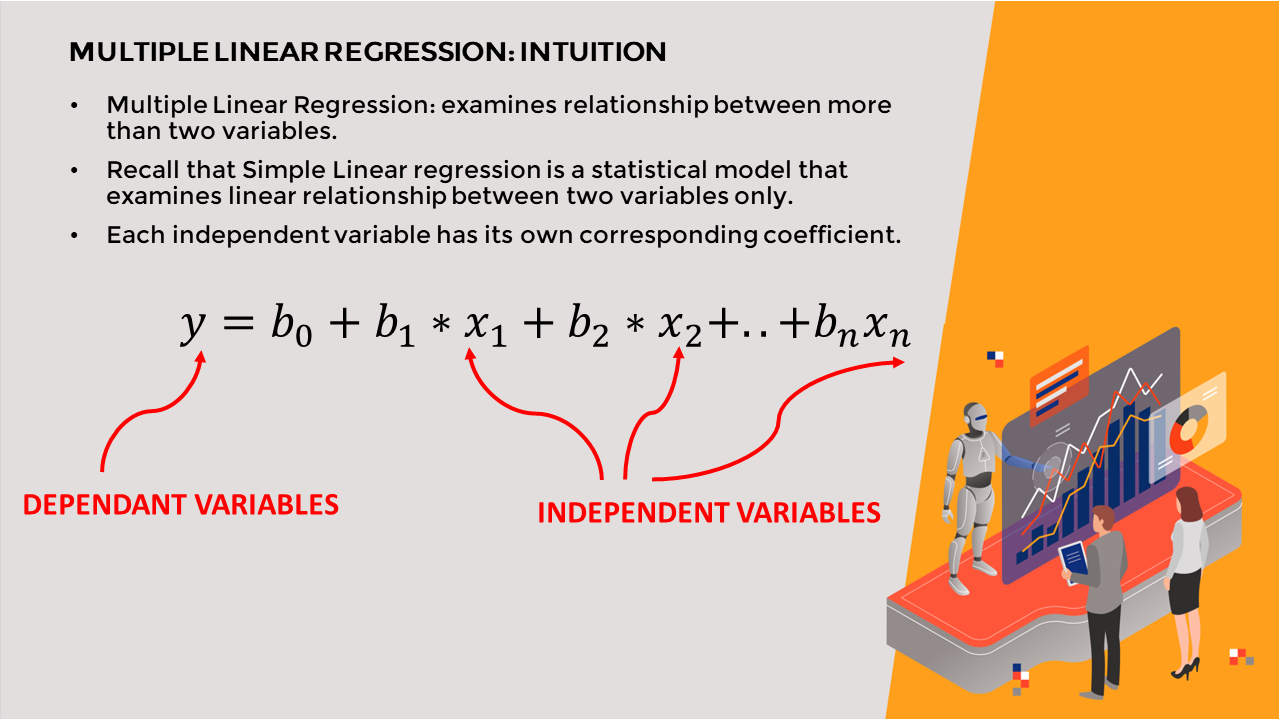

## TASK-2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# we need to mount our drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# we have to include the full path to the csv file containing our dataset
ad_df = pd.read_csv(r'C:\Users\mani2\Documents\Data Science For Business\datasets\Advertising_data.csv')

In [4]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### TASK-3: VISUALIZE DATASET

<Axes: >

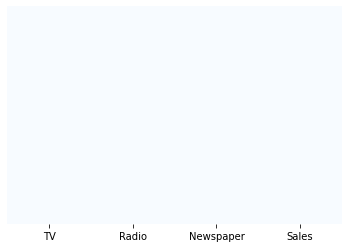

In [7]:
# Lets see if we have any missing data, luckily we dont.
sns.heatmap(ad_df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues')

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

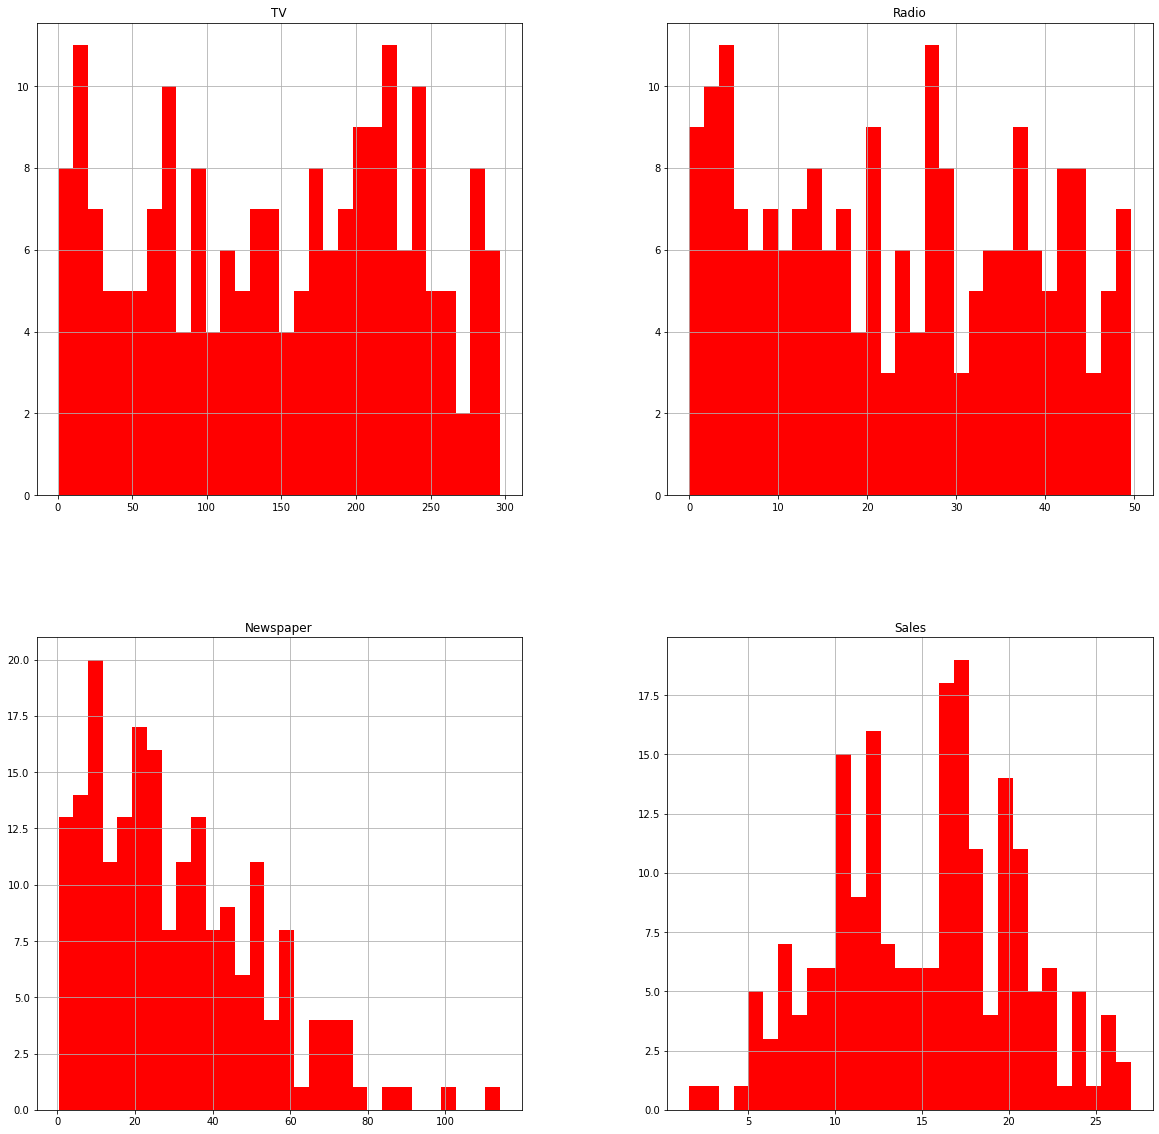

In [8]:
ad_df.hist(bins= 30, figsize= (20,20), color= 'r')

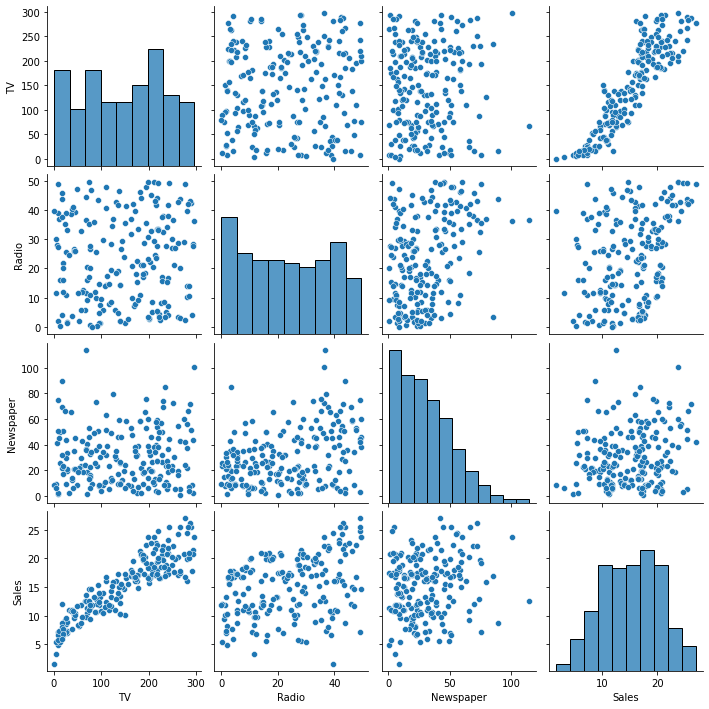

In [9]:
sns.pairplot(ad_df)

<Axes: >

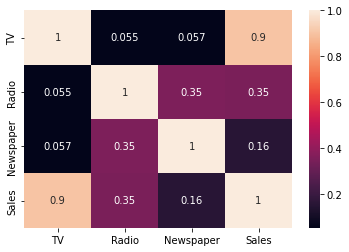

In [10]:
correlations = ad_df.corr()
sns.heatmap(correlations, annot= True)

### TASK-4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [11]:
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = ad_df[['TV', 'Radio', 'Newspaper']]

In [13]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
X.shape

(200, 3)

In [15]:
y = ad_df['Sales']

In [16]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
y.shape

(200,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [19]:
X_train.shape

(160, 3)

In [20]:
X_test.shape

(40, 3)

### TASK-5: TRAIN THE MODEL

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression(fit_intercept= True)

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (b):', regressor.intercept_)

Linear Model Coeff (m): [0.05406436 0.10343357 0.00279337]
Linear Model Coeff (b): 4.642918855764568


### TASK-6: EVALUATE THE MODEL

In [25]:
y_predict = regressor.predict(X_test)
y_predict

array([18.89031223, 16.43534867,  9.22953138, 20.72771894, 18.74411583,
       12.43656509, 10.89897848, 11.92794872, 10.08685403, 21.27530088,
       20.95842615, 10.13692606,  9.21843102, 17.25070654, 20.04256332,
       22.98336222, 14.51749038, 16.77230199,  6.43649117, 21.24868264,
       12.41259552, 21.07192193,  7.40899674, 23.61705341, 21.63048079,
       17.85663188, 21.18621812, 21.35986575, 17.90956311, 16.87297794,
       19.20891406, 17.09106092,  8.59736426, 13.91880193, 15.18328623,
       15.69797043, 10.81367474, 19.41508023, 11.04578231,  8.04462325])

In [26]:
y_test

168    17.1
194    17.3
126     6.6
84     21.7
11     17.4
90     14.0
148    10.9
94     11.5
136     9.5
58     23.8
39     21.5
32     13.2
158     7.3
100    16.7
92     19.4
147    25.4
173    16.7
162    19.9
91      7.3
109    19.8
16     12.5
33     17.4
119     6.6
36     25.4
128    24.7
110    18.4
0      22.1
150    16.1
165    16.9
97     20.5
14     19.0
181    17.2
170     8.4
37     14.7
120    15.5
4      17.9
134    10.8
27     20.9
190    10.8
121     7.0
Name: Sales, dtype: float64

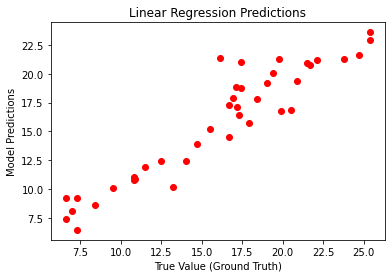

In [27]:
plt.scatter(y_test, y_predict, color= 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (Ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

In [29]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 1.864 
MSE = 3.4748878705938653 
MAE = 1.4209696111344248 
Mean Absolute Percentage Error = 9.509013622524224 %


### END